In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import psutil
import functions as fun
from rasterio.plot import reshape_as_raster, reshape_as_image, adjust_band


params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.family" : "serif",
          "font.serif" : ["times new roman"],
          "figure.dpi" : 150}
plt.rcParams.update(params)


%matplotlib widget


In [2]:
print(psutil.virtual_memory()[2])

55.9


In [3]:
c = 3e8
fs = 491.52e6*2
prf = 1e3
f0 = 5.39e9
lambda_ = c/f0
# B = 14/100
H = 2000

In [4]:
# directory = r'\\Sentinel\SNOWWI\Colorado2024\March\Radar_data\from_disk_F\save_data_nvme1n1\20240327T123855\outputs'
# az_samples = 10000
# rng_samples = 12500

# ch0 = fun.read_SNOWWI_SLC(directory, 'chan0_20240327T123855_slc.dat', az_samples, rng_samples)
# ch2 = fun.read_SNOWWI_SLC(directory, 'chan2_20240327T123855_slc.dat', az_samples, rng_samples)

directory = r'C:\Users\epsutherland\Downloads\output_test'

rng_samples = 3708
az_samples = 8571

ch0norm = 0.01298989076167345
ch1norm = 0.04269436001777649
ch2norm = 0.15891018509864807
ch3norm = 0.04255666956305504


avgnorm = np.mean([ch0norm, ch1norm, ch2norm, ch3norm])

# ch0 = fun.read_SNOWWI_SLC(directory, 'chan0_20240327T125534_2_slc.dat', az_samples, rng_samples) * ch0norm
# ch1 = fun.read_SNOWWI_SLC(directory, 'chan1_20240327T125534_2_slc.dat', az_samples, rng_samples) * ch1norm
# ch2 = fun.read_SNOWWI_SLC(directory, 'chan2_20240327T125534_2_slc.dat', az_samples, rng_samples) * ch2norm
# ch3 = fun.read_SNOWWI_SLC(directory, 'chan3_20240327T125534_2_slc.dat', az_samples, rng_samples) * ch3norm

ch0 = fun.read_SNOWWI_SLC(directory, 'chan0_20240327T125534_2_slc.dat', az_samples, rng_samples)
ch1 = fun.read_SNOWWI_SLC(directory, 'chan1_20240327T125534_2_slc.dat', az_samples, rng_samples) 
ch2 = fun.read_SNOWWI_SLC(directory, 'chan2_20240327T125534_2_slc.dat', az_samples, rng_samples) 
ch3 = fun.read_SNOWWI_SLC(directory, 'chan3_20240327T125534_2_slc.dat', az_samples, rng_samples) 



Looking for SLC at C:\Users\epsutherland\Downloads\output_test\chan0_20240327T125534_2_slc.dat to open...
Succesfully loaded SLC from C:\Users\epsutherland\Downloads\output_test\chan0_20240327T125534_2_slc.dat ...
Looking for SLC at C:\Users\epsutherland\Downloads\output_test\chan1_20240327T125534_2_slc.dat to open...
Succesfully loaded SLC from C:\Users\epsutherland\Downloads\output_test\chan1_20240327T125534_2_slc.dat ...
Looking for SLC at C:\Users\epsutherland\Downloads\output_test\chan2_20240327T125534_2_slc.dat to open...
Succesfully loaded SLC from C:\Users\epsutherland\Downloads\output_test\chan2_20240327T125534_2_slc.dat ...
Looking for SLC at C:\Users\epsutherland\Downloads\output_test\chan3_20240327T125534_2_slc.dat to open...
Succesfully loaded SLC from C:\Users\epsutherland\Downloads\output_test\chan3_20240327T125534_2_slc.dat ...


In [5]:
print(ch0.dtype)

complex64


In [6]:
Rmin = 1868
dR = 1.83
Rmax = Rmin + (dR*rng_samples)

azmin = 0
daz = 0.5
azmax = azmin + (daz*az_samples)

In [7]:
azlook = 3
rlook = 1

multi0 = fun.multilook(ch0, rlook, azlook)
multi1 = fun.multilook(ch1, rlook, azlook)
multi2 = fun.multilook(ch2, rlook, azlook)
multi3 = fun.multilook(ch3, rlook, azlook)

corrected0 = fun.multilook(abs(ch0), rlook, azlook)
corrected1 = fun.multilook(abs(ch1), rlook, azlook)
corrected2 = fun.multilook(abs(ch2), rlook, azlook)
corrected3 = fun.multilook(abs(ch3), rlook, azlook)

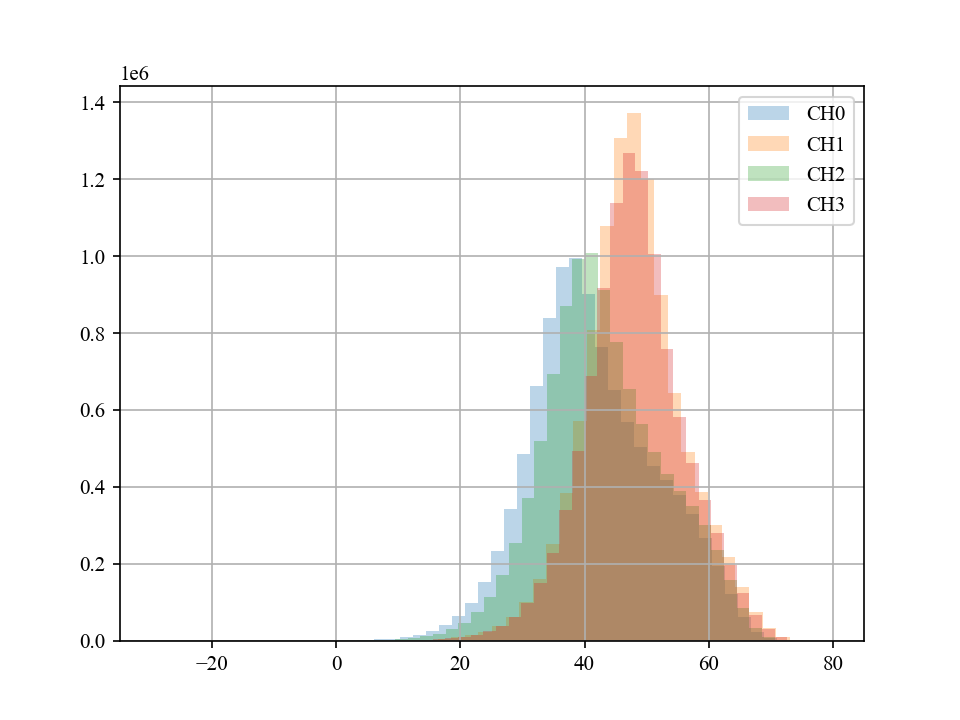

In [8]:
plt.figure()

plt.hist(20*np.log10(abs(multi0.flatten())), alpha=0.3, bins=50, label='CH0')
plt.hist(20*np.log10(abs(multi1.flatten())), alpha=0.3, bins=50, label='CH1')
plt.hist(20*np.log10(abs(multi2.flatten())), alpha=0.3, bins=50, label='CH2')
plt.hist(20*np.log10(abs(multi3.flatten())), alpha=0.3, bins=50, label='CH3')

plt.legend()
plt.grid()
plt.show()

In [9]:
Rminkm = Rmin/1000
Rmaxkm = Rmax/1000
azmaxkm = azmax/1000
azminkm = azmin/1000

In [10]:
R_correct = np.linspace(Rmin, Rmax, multi0.shape[1])**2

corrected0 *= R_correct
corrected1 *= R_correct
corrected2 *= R_correct
corrected3 *= R_correct


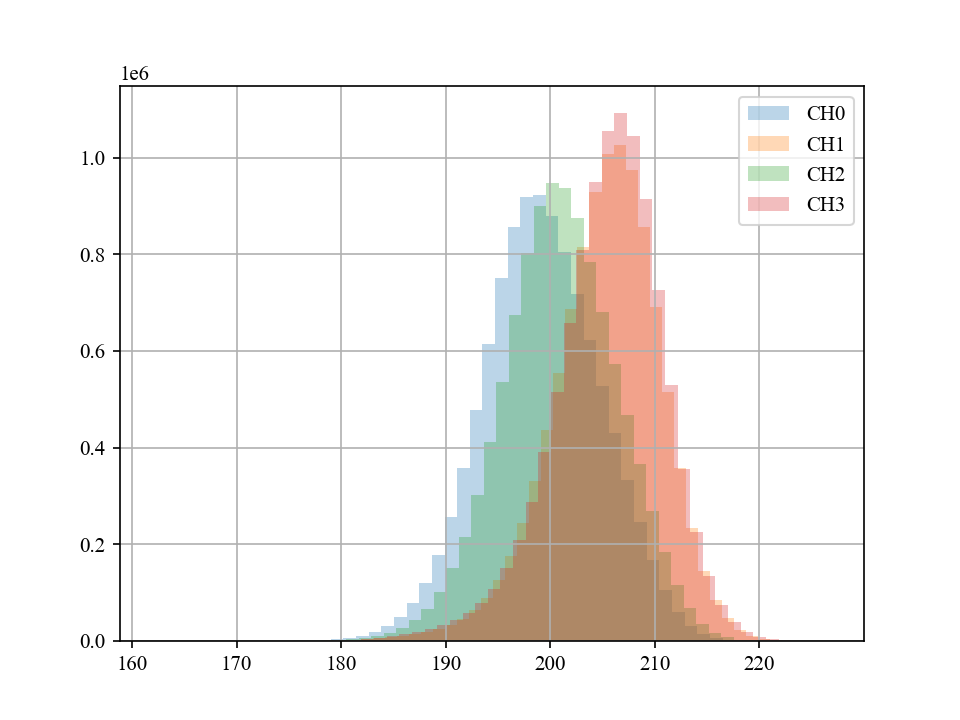

In [11]:
plt.figure()

plt.hist(20*np.log10(abs(corrected0.flatten())), alpha=0.3, bins=50, label='CH0')
plt.hist(20*np.log10(abs(corrected1.flatten())), alpha=0.3, bins=50, label='CH1')
plt.hist(20*np.log10(abs(corrected2.flatten())), alpha=0.3, bins=50, label='CH2')
plt.hist(20*np.log10(abs(corrected3.flatten())), alpha=0.3, bins=50, label='CH3')

plt.legend()
plt.grid()
plt.show()

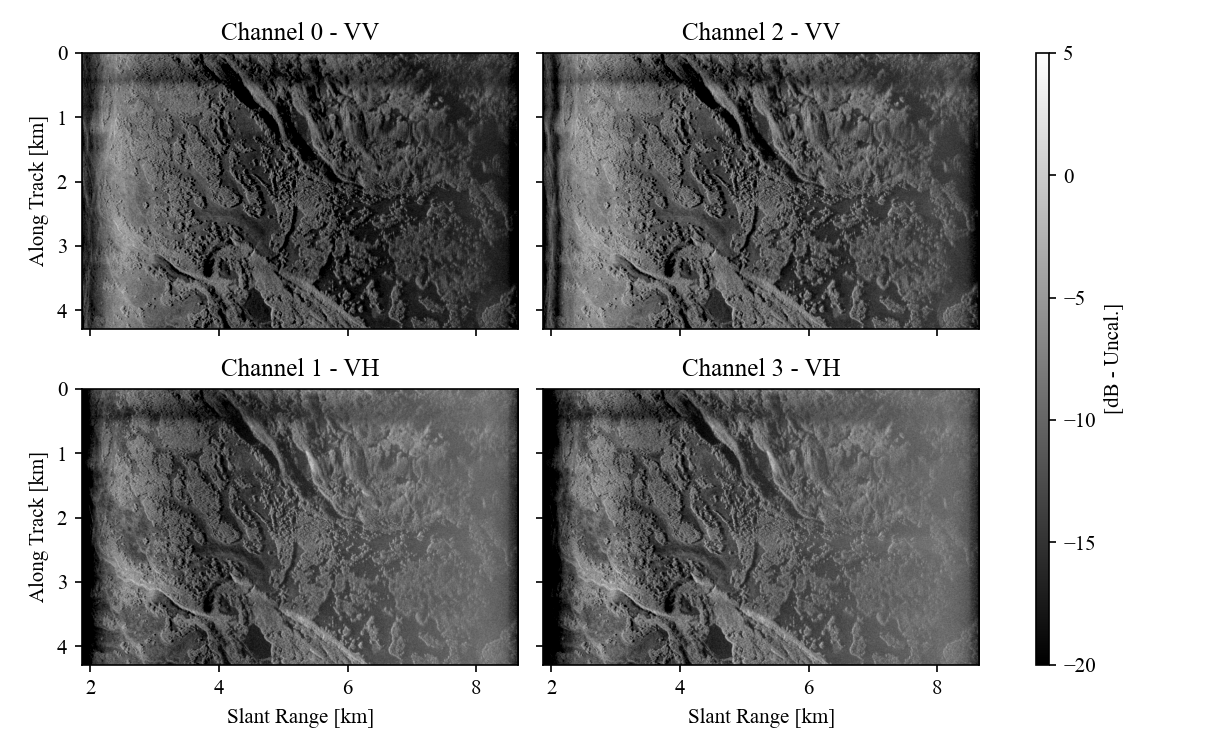

In [21]:

vmax = 218
vmin = vmax - 25

bias = vmax - 5
vmin = vmin - bias
vmax = vmax - bias
crosspol = 4

fig, ax = plt.subplots(2, 2, figsize=([8.2, 5]), sharex=True, sharey=True)
im0 = ax[0, 0].imshow(20*np.log10(abs(corrected0)) - bias, cmap='gray', vmin=vmin, vmax=vmax, interpolation='Bilinear', extent=[Rminkm, Rmaxkm, azmaxkm, azminkm])
ax[0, 0].set_title('Channel 0 - VV')
ax[0, 0].set_ylabel('Along Track [km]', fontsize=10)

# ax[0].set_ylabel('Along Track [km]')
# fig.colorbar(im0, ax=ax[0], shrink=0.75, label='[dB - Uncal.]')

im1 = ax[1, 0].imshow(20*np.log10(abs(corrected1)) - bias - crosspol, cmap='gray', vmin=vmin, vmax=vmax, interpolation='Bilinear', extent=[Rminkm, Rmaxkm, azmaxkm, azminkm])
ax[1, 0].set_title('Channel 1 - VH')
ax[1, 0].set_ylabel('Along Track [km]', fontsize=10)
ax[1, 0].set_xlabel('Slant Range [km]', fontsize=10)

# ax[1].set_xlabel('Slant Range [km]')
# ax[1].set_ylabel('Along Track [km]')

# fig.colorbar(im1, ax=ax[1], shrink=0.75, label='[dB - Uncal.]')

im2 = ax[0, 1].imshow(20*np.log10(abs(corrected2)) - bias, cmap='gray', vmin=vmin, vmax=vmax, interpolation='Bilinear', extent=[Rminkm, Rmaxkm, azmaxkm, azminkm])
ax[0, 1].set_title('Channel 2 - VV')

im3 = ax[1, 1].imshow(20*np.log10(abs(corrected3)) - bias - crosspol, cmap='gray', vmin=vmin, vmax=vmax, interpolation='Bilinear', extent=[Rminkm, Rmaxkm, azmaxkm, azminkm])
ax[1, 1].set_title('Channel 3 - VH')
ax[1, 1].set_xlabel('Slant Range [km]', fontsize=10)

# fig.suptitle(f'C-Band Grand Mesa 3-27-2024')
fig.tight_layout()
fig.colorbar(im0, ax=ax.ravel().tolist(), label='[dB - Uncal.]', aspect=50)

# fig.supxlabel('Slant Range [km]')
# fig.supylabel('Along Track [km]', fontsize=10)



# image_file = f'cband_4channel.png'
# plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)


plt.show()

In [22]:
ch0sub = ch0[1500:7500, 500:2500]
ch2sub = ch2[1500:7500, 500:2500]
R = np.linspace(Rmin, Rmax, ch0.shape[1])




multix = 2
multiy = multix *3




def coherence(data0, data1, multix, multiy):
    return fun.multilook(data0 * np.conjugate(data1), multix, multiy) / (np.sqrt(fun.multilook(abs(data0)**2, multix, multiy) * fun.multilook(abs(data1)**2, multix, multiy)))

sub_coherence = coherence(ch0sub, ch2sub, multix, multiy)
Rsub = np.linspace(R[500], R[2500], sub_coherence.shape[1])


B = 14/100

deltaR = (B*H) / Rsub
deltaphi = np.exp((-1j*deltaR*2*np.pi/lambda_))
interferogram = sub_coherence*deltaphi
interferogram = interferogram * np.exp(-1j * np.mean(np.angle(interferogram.flatten())))



In [23]:
print(ch2sub.shape)
print(sub_coherence.shape)

(6000, 2000)
(1000, 1000)


In [ ]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(4, 12))

im0 = ax[0].imshow(20*np.log10(fun.multilook(abs(ch0sub), multix, multiy)), cmap='gray', interpolation='none', aspect='equal')#, extent=[Rmin, Rmax, azmax, 0])
ax[0].set_title('Magnitude Reference')
ax[0].set_xlabel('Slant Range [m]')
ax[0].set_ylabel('Along Track [m]')
fig.colorbar(im0, ax=ax[0], label='[dB - Uncal]')

im2 = ax[1].imshow(np.angle(sub_coherence), cmap='hsv', vmin=-np.pi, vmax=np.pi, interpolation='bilinear', aspect='equal')#, extent=[Rmin, Rmax, azmax, 0])
ax[1].set_title('Coherence Phase')
ax[1].set_xlabel('Slant Range [m]')
ax[1].set_ylabel('Along Track [m]')

fig.colorbar(im2, ax=ax[1], label='[Radians]')

im1 = ax[2].imshow(np.angle(interferogram), cmap='hsv', vmin=-np.pi/2, vmax=np.pi/2, interpolation='bilinear', aspect='equal')#, extent=[Rmin, Rmax, azmax, 0])
ax[2].set_title('Interferometric Phase')
ax[2].set_xlabel('Slant Range [m]')
ax[2].set_ylabel('Along Track [m]')
fig.colorbar(im1, ax=ax[2], label='[Radians]')




# fig.suptitle(f'{multix}x{multix} Averaging - Coherence')

# image_file = f'CBand_GM_03272024_ch0_ch2_Coherence.png'
# plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)

plt.show()

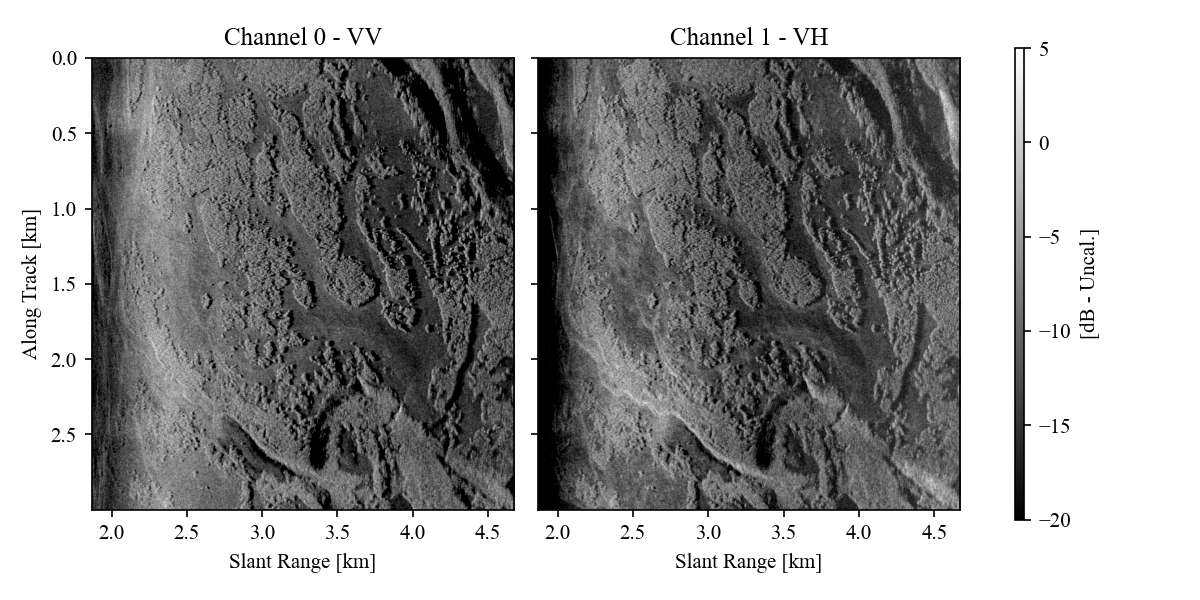

In [28]:
vmax = 218
vmin = vmax - 25

bias = vmax - 5
vmin = vmin - bias
vmax = vmax - bias
crosspol = 4

fig, ax = plt.subplots(1, 2, figsize=([8, 4]), sharex=True, sharey=True)
im0 = ax[0].imshow(20*np.log10(fun.multilook(abs(corrected0[500:2500, 0:2000]), 2, 2)) - bias, cmap='gray', vmin=vmin, vmax=vmax, interpolation='bilinear', extent=[Rminkm, 0.54*Rmaxkm, 0.7*azmaxkm, azminkm])
ax[0].set_title('Channel 0 - VV')
ax[0].set_ylabel('Along Track [km]')
ax[0].set_xlabel('Slant Range [km]')

# ax[0].set_ylabel('Along Track [km]')
# fig.colorbar(im0, ax=ax[0], shrink=0.75, label='[dB - Uncal.]')

im1 = ax[1].imshow(20*np.log10(fun.multilook(abs(corrected1[500:2500, 0:2000]), 2, 2)) - bias - crosspol, cmap='gray', vmin=vmin, vmax=vmax, interpolation='bilinear', extent=[Rminkm, 0.54*Rmaxkm, 0.7*azmaxkm, azminkm])
ax[1].set_title('Channel 1 - VH')
ax[1].set_xlabel('Slant Range [km]')
# ax[1].set_ylabel('Along Track [km]')




# fig.suptitle(f'C-Band Grand Mesa 3-27-2024')
fig.tight_layout()
fig.colorbar(im0, ax=ax.ravel().tolist(), label='[dB - Uncal.]', aspect=50)

# fig.supxlabel('Slant Range [km]')
# fig.supylabel('Along Track [km]', fontsize=10)



image_file = f'CBand_GM_zoomed_presentation.png'
plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)


plt.show()

In [ ]:
# interferogram = abs(np.angle(co_ch0)) - abs(np.angle(co_ch2))
multix = 2
multiy = multix

co0_multilook = fun.multilook(multi0, multix, multiy)
co2_multilook = fun.multilook(multi2, multix, multiy)




In [ ]:
# interferogram_multilook = fun.multilook(interferogram, 4, 4)
# coherence = (co0_multilook * np.conjugate(co2_multilook)) / (np.sqrt(abs(co0_multilook)**2) * np.sqrt(abs(co2_multilook)**2))
coherence = fun.multilook(multi0 * np.conjugate(multi2), multix, multiy) / (np.sqrt(fun.multilook(abs(multi0)**2, multix, multiy) * fun.multilook(abs(multi2)**2, multix, multiy)))

coherence = fun.multilook(ch0 * np.conjugate(ch2), multix, multiy) / (np.sqrt(fun.multilook(abs(ch0)**2, multix, multiy) * fun.multilook(abs(ch2)**2, multix, multiy))) * np.exp(1.2j)

In [ ]:
print(coherence.shape)

In [ ]:
fig, ax = plt.subplots(1, 2)
im1 = ax[0].imshow(abs(coherence), cmap='gray', vmin=0, vmax=1, interpolation='nearest', aspect='equal', extent=[Rmin, Rmax, azmax, 0])
ax[0].set_title('Coherence Mag')
ax[0].set_xlabel('Slant Range [m]')
ax[0].set_ylabel('Along Track [m]')
fig.colorbar(im1, ax=ax[0], shrink=0.5)


im2 = ax[1].imshow(np.angle(coherence), cmap='hsv', vmin=-np.pi, vmax=np.pi, interpolation='none', aspect='equal', extent=[Rmin, Rmax, azmax, 0])
ax[1].set_title('Coherence Phase')
ax[1].set_xlabel('Slant Range [m]')
fig.colorbar(im2, ax=ax[1], label='[Radians]', shrink=0.5)

fig.suptitle(f'{multix}x{multix} Averaging - Coherence')

# image_file = f'CBand_GM_03272024_ch0_ch2_Coherence.png'
# plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)

plt.show()

In [ ]:
# H = 2200
B = 14/100
# R = np.linspace(Rmin, Rmax, coherence.shape[1])
R = 2000*np.sqrt(2)

deltaR = (B*H) / R
deltaphi = np.exp((-1j*deltaR*2*np.pi/lambda_))
interferogram = coherence*deltaphi

In [ ]:
dheight = np.angle(interferogram)*R /(B*2*np.pi/lambda_)

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True)
im1 = ax[0].imshow(abs(interferogram), cmap='gray', vmin=0, vmax=1, interpolation='nearest', aspect='equal', extent=[Rmin, Rmax, azmax, 0])
ax[0].set_title('Coherence Mag')
ax[0].set_xlabel('Slant Range [m]')
ax[0].set_ylabel('Along Track [m]')
fig.colorbar(im1, ax=ax[0], shrink=0.5)


im2 = ax[1].imshow(np.angle(interferogram), cmap='hsv', vmin=-np.pi/2, vmax=np.pi/2, interpolation='bilinear', aspect='equal', extent=[Rmin, Rmax, azmax, 0])
ax[1].set_title('Interferogram Phase')
ax[1].set_xlabel('Slant Range [m]')
fig.colorbar(im2, ax=ax[1], label='[Radians]', shrink=0.5)

fig.suptitle(f'{multix}x{multix} Averaging - Coherence')

# image_file = f'CBand_GM_03272024_ch0_ch2_interferogram2.png'
# plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)

plt.show()

In [ ]:
hwrap = 100

dheight %= hwrap

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 6))
im1 = ax[0].imshow(dheight, cmap='viridis', vmin=0, vmax=80, interpolation='none', aspect='equal', extent=[Rmin, Rmax, azmax, 0])
ax[0].set_title('Change in Height')
ax[0].set_xlabel('Slant Range [m]')
ax[0].set_ylabel('Along Track [m]')
fig.colorbar(im1, ax=ax[0])


im2 = ax[1].imshow(fun.multilook(np.angle(interferogram), 1, 1), cmap='hsv', vmin=-np.pi/4, vmax=np.pi/4, interpolation='bilinear', aspect='equal', extent=[Rmin, Rmax, azmax, 0])
ax[1].set_title('Interferogram Phase')
ax[1].set_xlabel('Slant Range [m]')
fig.colorbar(im2, ax=ax[1], label='[Radians]')

fig.suptitle(f'{multix}x{multix} Averaging - Coherence')

# image_file = f'CBand_GM_03272024_ch0_ch2_interferogram2.png'
# plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)

plt.show()


In [ ]:

# plt.figure()

# plt.imshow(fun.multilook(dheight, 4, 4), vmin=-200, vmax=-150, interpolation='none')

# plt.colorbar()

# plt.show()


In [ ]:
# import glob

In [ ]:
# print(os.listdir(r'\\Sentinel\SNOWWI\Colorado2024\March\Radar_data\from_disk_F\save_data_nvme1n1'))


In [ ]:
# print(glob.glob(r'\\Sentinel\SNOWWI\Colorado2024\March\Radar_data\from_disk_F\save_data_nvme1n1\2024*'))

In [ ]:
directory = r'C:\Users\epsutherland\Desktop\ForThesis'

rng_samples = 1083
az_samples = 18750

NH_slc = fun.read_SNOWWI_SLC(directory, 'Final_slc_NH_Airport_slc.dat', az_samples, rng_samples)

# directory = r'\\Sentinel\SNOWWI\Colorado2024\March\Radar_data\from_disk_F\save_data_nvme1n1\20240327T125534\outputs'
# second = fun.read_SNOWWI_SLC(directory, 'chan2_20240327T125534_slc.dat', az_samples, rng_samples)



In [ ]:
# diff = first - second

# plt.figure()

# plt.hist(diff.flatten())

# plt.show()

In [ ]:

dR = 1.83
dAz = 0.25

Rmin = 980
Rmax = Rmin + dR*rng_samples

azmax = dAz*az_samples

Rminkm = Rmin/1000
Rmaxkm = Rmax/1000
azminkm=0
azmaxkm = azmax/1000


NH = fun.multilook(abs(NH_slc), 1, 10)



# Rmin=2000
# Rmax = Rmin + dR*first.shape[1]
# azR = dAz*multi0.shape[0]

# Rgnd = np.sqrt((Rmax)**2 - H**2)
# dRgnd = Rgnd/multi0.shape[1]

In [ ]:
print(Rmax - Rmin)

In [ ]:
R_correct = np.linspace(Rmin, Rmax, NH.shape[1])**1.8

In [ ]:
NHcorrected = (NH * R_correct)
plt.figure()

plt.hist(20*np.log10(abs(NHcorrected.flatten())), alpha=0.3, bins=50, label='CH0')


plt.legend()
plt.grid()
plt.show()

In [ ]:
%matplotlib widget
import matplotlib.image as mpimg
img = mpimg.imread(r'C:\Users\epsutherland\Desktop\ForThesis\NH_GoogleEarth.png')


# vmin = 30
# vmax = 80
vmax=183
vmin=vmax-25


bias = vmax-5
vmin -= bias
vmax -= bias

fig, ax = plt.subplots(figsize=[8.4, 8], nrows=1, ncols=2, sharey=True)


im0 = ax[0].imshow(img, origin='upper', extent=[Rminkm, Rmaxkm, azminkm, azmaxkm])
ax[0].set_ylabel('Along Track [km]')
ax[0].set_xlabel('Ground Range [km]')



im = ax[1].imshow(20*np.log10(abs(NHcorrected)) - bias, vmin=vmin, vmax=vmax, origin='lower', cmap='gray',  interpolation='bilinear', aspect='equal', extent=[Rminkm, Rmaxkm, azminkm, azmaxkm])
ax[1].set_xlabel('Slant Range [km]')
# ax[1].set_ylabel('Along Track [km]')

fig.colorbar(im, ax=ax[1], label='[dB - Uncal.]', aspect=50)
fig.tight_layout()

# image_file = f'CBand_NH_Magnitude_fixed.pdf'
# plt.savefig(os.path.join(r'C:\Users\epsutherland\Desktop\ForThesis', image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)


plt.show()

In [ ]:
%matplotlib widget

vmin = -20
vmax = 20

# vmin = 30
# vmax = 60

fig, ax = plt.subplots(figsize=[12, 4], nrows=1, ncols=1)

im = ax.imshow(20*np.log10(abs(rngCorrected)), origin='upper', cmap='gray',  interpolation='bilinear', aspect='equal', extent=[0, Rgnd, azR, 0])
ax.set_title('CH2 Magnitude')
ax.set_xlabel('Cross Track [m]')
ax.set_ylabel('Along Track [m]')
fig.colorbar(im, ax=ax, label='[dB - Uncal.]')

# image_file = f'CBand_CO_ch2_test.png'
# plt.savefig(os.path.join(directory, image_file), dpi=1000, bbox_inches='tight', pad_inches=0.25, transparent=False)


plt.show()

In [ ]:
plt.figure()

plt.plot(20*np.log10(abs(onefft)))

plt.show()

In [ ]:
len(oneline)

In [ ]:
vmin = 150
vmax = 160

plt.figure()

plt.imshow(20*np.log10(abs(slcfft)), vmin=vmin, vmax=vmax, interpolation='None', extent=[ 0, (fs*10**-6)/2, -prf/2, prf/2])

plt.xlabel('Range Freq [MHz]')
plt.ylabel('Azimuth Freq [Hz]')
plt.colorbar(label='[dB - Uncal.]')

plt.show()

In [ ]:
def read_SNOWWI_SLC32(directory, filename, az_samples, range_samples):

    complex_ = np.zeros((az_samples, range_samples))

    item = os.path.join(directory, filename)

    print(f'Looking for SLC at {item} to open...')

    with open(item, 'rb') as f:
        data = np.fromfile(f, dtype=np.float32, count=-1)

    real = np.reshape(data[0::2].astype(np.float32), (az_samples, range_samples))
    im = np.reshape(np.multiply(data[1::2].astype(np.float32), 1j), (az_samples, range_samples))
    
    complex_ = real + im

    print(f'Succesfully loaded SLC from {item} ...')

    return complex_

def read_SNOWWI_SLC16(directory, filename, az_samples, range_samples):

    complex_ = np.zeros((az_samples, range_samples))

    item = os.path.join(directory, filename)

    print(f'Looking for SLC at {item} to open...')

    with open(item, 'rb') as f:
        data = np.fromfile(f, dtype=np.float16, count=-1)

    real = np.reshape(data[0::2].astype(np.float16), (az_samples, range_samples))
    im = np.reshape(np.multiply(data[1::2].astype(np.float16), 1j), (az_samples, range_samples))
    
    complex_ = real + im

    print(f'Succesfully loaded SLC from {item} ...')

    return complex_

In [ ]:
d16 = r'C:\Users\epsutherland\Documents\SNOWWI Outputs\180_files_32bitDoppler_16bitSLC'
slc16 = r'chan2_20240327T125534_2_slc_240_420.dat'

d32 = r'C:\Users\epsutherland\Downloads\output_test'
slc32 = r'chan2_20240327T125534_2_slc_32bit.dat'

slc16 = read_SNOWWI_SLC16(d16, slc16, 3708, 12857) * 0.2744598686695099
slc32 = read_SNOWWI_SLC32(d32, slc32, 3708, 12857)

In [ ]:
diff = slc32 - slc16
diff.shape
plt.figure()

plt.imshow(abs(diff), vmin=0, vmax=0.5, interpolation='None')

plt.colorbar()
plt.plot()

In [ ]:
plt.figure()

# plt.hist(abs(diff.flatten()), bins=200, label='Magnitude', color='k')
plt.hist(np.real(diff.flatten()), bins=100, alpha=0.5, label='Real', color='r')
plt.hist(np.imag(diff.flatten()), bins=100, alpha=0.5, label='Imaginary', color='b')

plt.title('Difference Between 32-bit and 16-bit SLC')
plt.xlabel('Pixel Value Difference')

plt.xlim(-1, 1)
# plt.ylim(0, 1e7)
plt.grid()
plt.legend()
plt.plot()

In [ ]:
print(' --- Real Part ---')
print(f'Mean:    {np.mean(np.real(diff.flatten()))}')
print(f'StDev:   {np.std(np.real(diff.flatten()))}')
print(f'Maximum: {np.max(np.real(diff.flatten()))}')

print(' --- Imag Part ---')
print(f'Mean:    {np.mean(np.imag(diff.flatten()))}')
print(f'StDev:   {np.std(np.imag(diff.flatten()))}')
print(f'Maximum: {np.max(np.imag(diff.flatten()))}')
